In [ ]:
#Import libraries
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

In [ ]:
from sklearn.datasets import load_boston
bdata = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted

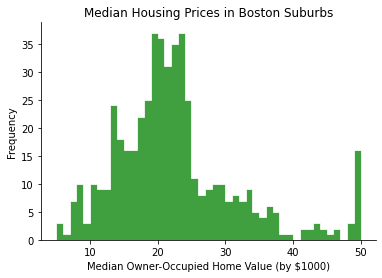

In [ ]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt

#Define ax subplot to edit axes
ax = plt.subplot(111)

#Create histogram with binwidth=1 ($1000)
#Set color to green and histtype to one that doesn't include borders
ax.hist(bdata.target,bins=np.arange(min(bdata.target),max(bdata.target)+1,1),
       facecolor="green", color="white", histtype="step", alpha=0.75, fill=True)

#Get rid of axes and tick marks on top and right
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")

#Add title, xlabels, and ylabels
plt.title("Median Housing Prices in Boston Suburbs")
plt.xlabel("Median Owner-Occupied Home Value (by $1000)")
plt.ylabel("Frequency")

#Show plot
plt.show()

In [ ]:
#Create pd dataframe for data with the correct types of data for each variable
boston_df = pd.DataFrame(bdata.data, columns=bdata.feature_names)
boston_df["MEDV"] = pd.DataFrame(bdata.target, columns=["MEDV"])
boston_df["RAD"] = boston_df["RAD"].astype(int)
boston_df["CHAS"] = boston_df["CHAS"].astype(object)

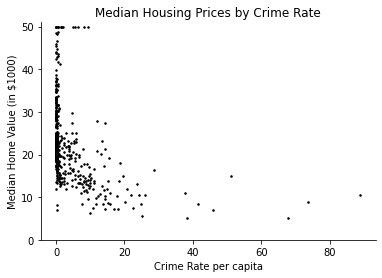

In [ ]:
#Create scatterplot of MEDV vs. CRIM
ax1 = plt.subplot(111)
ax1.plot(boston_df.CRIM, boston_df.MEDV, "ko", markersize=1.5)
ax1.set_ybound(0,51)

#Get rid of axes and tick marks on top and right
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.yaxis.set_ticks_position("left")
ax1.xaxis.set_ticks_position("bottom")

#Add title, xlabels, and ylabels
plt.title("Median Housing Prices by Crime Rate")
plt.xlabel("Crime Rate per capita")
plt.ylabel("Median Home Value (in $1000)")

#Show Plot
plt.show()

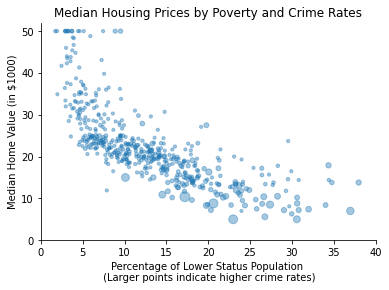

In [ ]:
#Plot Median Household Income by Distance to Employment Center
#Each point's size will be determined by proportion of buildings built before 1940

#Create scatterplot of MEDV vs. LSTAT with point size determined by crime rate
ax2 = plt.subplot(111)
ax2.scatter(boston_df.LSTAT, boston_df.MEDV, s=boston_df.CRIM+10, alpha=0.4)
ax2.set_ybound(0,52)
ax2.set_xbound(0,40)

#Get rid of axes and tick marks on top and right
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.yaxis.set_ticks_position("left")
ax2.xaxis.set_ticks_position("bottom")

plt.title("Median Housing Prices by Poverty and Crime Rates")
plt.xlabel("Percentage of Lower Status Population \n (Larger points indicate higher crime rates)")
plt.ylabel("Median Home Value (in $1000)")

plt.show()

In [ ]:
def compute_rmse(predictions, yvalues):
    resid = np.subtract(predictions,yvalues)
    squared_resid = resid**2
    n = squared_resid.size
    sum_squared_resid = np.sum(squared_resid)
    rmse = np.sqrt(sum_squared_resid/n)
    return rmse
print("Example: RMSE[(2,2,3),(0,2,6)] = %.2f" % (compute_rmse((2,2,3),(0,2,6))))

Example: RMSE[(2,2,3),(0,2,6)] = 2.08


In [ ]:
#Splitting data using train_test_split. Use random state to repeat analysis.
from sklearn.model_selection import train_test_split

bdata_train, bdata_test = train_test_split(boston_df, test_size=0.34, random_state=200)

In [ ]:
#Poor Model function
def poor_model(median_values):
#Calculate the average median home value of training set
    pred_value = np.mean(median_values)
#Use this average as prediction for each element
    pred_array = np.asarray([pred_value]*median_values.size)
    return(pred_array)

#Find RMSE for training set
poor_model_pred_train = poor_model(bdata_train.MEDV)
poor_model_rmse_train = compute_rmse(poor_model_pred_train, bdata_train.MEDV)

#Find RMSE for testing set
poor_model_pred_test = poor_model(bdata_test.MEDV)
poor_model_rmse_test = compute_rmse(poor_model_pred_test, bdata_test.MEDV)

#Print the results for each
print("Training RMSE: %.4f" % poor_model_rmse_train)
print("Testing RMSE: %.4f" % poor_model_rmse_test)

Training RMSE: 8.6133
Testing RMSE: 10.2023


In [ ]:
#Euclidean distance is measured by the sum of sqrt((x1-x2)^2))
#Create function that outputs this distance for given values of x1, x2, and L
def distance(x1, x2, L):
    sum_dist = 0
    for k in range(L):
        sum_dist += (x1[k] - x2[k])**2
    dist = sum_dist**(1/2)
    return dist

#Example
print("Example: Sets (3,4) and (6,8) with L=2 results in the L-Norm Distance %.1f" % (distance((3,4),(6,8),2)))

Example: Sets (3,4) and (6,8) with L=2 results in the L-Norm Distance 5.0


In [ ]:
import time


def knn(testing_data, training_data, L, K=1):
    #Begin calculation timer
    start_time = time.time()
    
    #Define empty arrays for: 
    #(1) The model predicted median home values for each testing instance  
    #(2) The actual median home values for each testing instance   
    predict_medv = []
    actual_medv = []
    
    #Loop over all testing instances
    for i in range(len(testing_data)):
        
        #Define current_test as the current iteration's testing values for each feature/variable
        current_test = testing_data[i]
        
        #Create empty array that will contain euclidean distances between current testing instance and every training instance
        distances = []
        
        #Loop the current testing instance over all training instances
        for j in range(len(training_data)):
            
            #Define current_train as the current iteration's training values for each feature/variable
            current_train = training_data[j]
            
            #Calculate distance between the jth training instance for testing instance i and append the following to the distance array:
            #(1) The current training instances values for explanatory and response features/variables
            #(2) The euclidean distance
            current_dist = distance(current_train, current_test, L)
            distances.append((current_train, current_dist))
        
        #After finding each distance between the current testing instance and all training instances,
        #Sort the distances array by euclidean distances (ascending order)
        distances.sort(key=lambda x: x[1])
        
        #Create empty array that will contain the training response variable (Lth feature is MEDV in this case)
        #Iterate over given K (default is K=1) and add the training response variable for the first K values in sorted distance array (i.e., K closest neighbors)
        k_nearest_dist = []
        for k in range(K):
            k_nearest_dist.append(distances[k][0][L])
        
        #Calculate the mean of the K closest neighbors as the predicted response of the current test instance.
        k_mean_dist = np.mean(k_nearest_dist)
        
        #Append the prediction and actual response values for the current test instance
        predict_medv.append(k_mean_dist)
        actual_medv.append(current_test[L])
    
    #After completing the loop for each testing instance, calculate the RMSE using the predicted and actual arrays
    rmse = compute_rmse(predict_medv,actual_medv)
    
    #Print the time taken to run knn function
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return rmse

#For this example, we are going to use CRIM and RM to predict MEDV
test_set = np.asarray(bdata_test[["CRIM","RM","MEDV"]])
train_set = np.asarray(bdata_train[["CRIM","RM","MEDV"]])
length = 2

print("RMSE for K=1 nearest neighbor predicted MEDV response using CRIM and RM predictors: %.4f" % (knn(test_set, train_set, length)))

Time taken: 0.39 seconds
RMSE for K=1 nearest neighbor predicted MEDV response using CRIM and RM predictors: 7.7841


In [ ]:
def normalize(raw_data):
    n_instances = len(raw_data)
    n_features = raw_data.shape[1]
    normalized_data = np.zeros(shape=(n_instances,n_features))
    normalized_data[:,n_features-1] = raw_data[:,n_features-1]
    for i in range(n_features-1):
        current_feature_mean = np.mean(raw_data[:,i])
        current_feature_sd = np.std(raw_data[:,i])
        normalized_data[:,i] = (raw_data[:,i]-current_feature_mean)/current_feature_sd        
    return normalized_data

norm_test_set_1 = normalize(test_set)
norm_train_set_1 = normalize(train_set)
length = 2



In [ ]:
#different two features (DIS, LSTAT)
norm_test_set_2 = normalize(np.asarray(bdata_test[["DIS","LSTAT","MEDV"]]))
norm_train_set_2 = normalize(np.asarray(bdata_train[["DIS","LSTAT","MEDV"]]))
length = 2

print("RMSE for predicted MEDV response using L=2 normalized DIS and LSTAT predictors: %.4f" % (knn(norm_test_set_2, norm_train_set_2, length)))

Time taken: 0.29 seconds
RMSE for predicted MEDV response using L=2 normalized DIS and LSTAT predictors: 6.7820


In [ ]:
#three features (RM, DIS, LSTAT)
norm_test_set_3 = normalize(np.asarray(bdata_test[["RM","DIS","LSTAT","MEDV"]]))
norm_train_set_3 = normalize(np.asarray(bdata_train[["RM","DIS","LSTAT","MEDV"]]))
length = 3

print("RMSE for predicted MEDV response using L=3 normalized RM, DIS and LSTAT predictors: %.4f" % (knn(norm_test_set_3, norm_train_set_3, length)))

Time taken: 0.19 seconds
RMSE for predicted MEDV response using L=3 normalized RM, DIS and LSTAT predictors: 6.2181


In [ ]:
#Import random and math for cross-validation function
import random, math

#Define my_kfolds function
def my_kfolds(full_df, nfolds, features, K=1):
    
    #Start timer for running the function
    my_start_time = time.time()
    
    #Define n_instances as the number of rows within the given full dataframe
    n_instances = full_df.shape[0]
    
    #Find the maximum number of instances that each group can have while maintaining equal-sized folds constraint
    min_per_group = math.floor(n_instances/nfolds)
    
    #Find the remaining number of instances that can't be evenly split (i.e., one for each fold).
    remainder = n_instances - nfolds*min_per_group
    
    #Create a listed sequence from 0 to nfolds-1. 
    #This sequence will be the "factors" used to divide the full dataset into equal-sized folds
    fold_seq = list(range(nfolds))
    
    #Create an empty array that will end up being the "GROUP" column appended to the full dataframe
    fold_group = []
    
    #Loop over the maximum number of times we can add each value of the fold_seq to the dataset rows without leaving any value out
    for i in range(min_per_group):
        #For each iteration, randomly sample all values within fold_seq. Append each shuffled iteration's sequence to fold_group.
        #(Note: This method performs random.shuffle while being able to assign the shuffled sequence to a variable.)
        new_set = random.sample(fold_seq,  nfolds)
        fold_group.extend(new_set)
    
    #If the dataset doesn't allow perfectly equal-sized folds, randomly assign the remainder--maximum of one for any individual fold. 
    remainder_group = random.sample(fold_seq, remainder)
    
    #Add the remainder_group to fold_group to create a vector of randomly assigned folds/groups for each row in the full dataset.
    fold_group.extend(remainder_group)
    
    #Add fold_group to the full dataset with column name "GROUP"
    full_df["GROUP"] = fold_group
    
    #Create an empty dictionary called "subsets" that will contain the dataframe subsets for each fold
    subsets = {}
    
    #Iterate over nfolds and assign each dataframe instance to its subset/fold by its randomly assigned "GROUP" value.
    for i in range(nfolds):
        subsets[i] = full_df[full_df["GROUP"]==i]
    
    #L = number of explanatory features, so I assign length for use in the knn/nneighbor functions.    
    length = len(features) - 1
    
    #Create an array that will contain the RMSE calculated for each cross-validated fold.
    all_rmse = []
    
    #Perform cross-validation by iterating over each fold
    for i in range(nfolds):
        
        #Define the testing set as the current iteration's normalized fold/subset (as an array)
        current_test = normalize(np.asarray(subsets[i][features]))
        
        #Initialize an empty dataframe for the current iteration's training subset
        #Ensure the dataframe has the correct number of columns to match the given features
        current_train_df = pd.DataFrame(columns=features)
        
        #Iterate over all folds
        for j in range(nfolds):
            
            #Concatenate each subset's dataframe for the given features EXCEPT for the current iteration's testing subset
            if j != i:
                current_train_df = pd.concat([current_train_df, subsets[j][features]])
            else:
                continue
        
        #Define the training set as the combination of all normalized (as array) folds--excluding the current testing fold.
        current_train = normalize(np.asarray(current_train_df))
        
        #Calculate the RMSE for the current iteration's testing set using knn (previously nneighbor) to model the training set.
        #Append this RMSE value to the all_rmse array
        all_rmse.append(knn(current_test, current_train, length, K))
        
        #Before implementing knn, I used the following function to calculate each rmse using nneighbor function
        #all_rmse.append(nneighbor(current_test, current_train, length))
        
    #After completing each fold's iteration, calculate and return the average RMSE over all folds.
    avg_rmse = np.mean(all_rmse)
    
    #Report the Total time taken to perform cross-validation
    print("Time taken for all folds: " + str(round(time.time() - my_start_time,2)) + " seconds")
    return(avg_rmse)

#Run my_kfolds function for the full boston housing dataframe using 10-fold cross-validation
#Use CRIM and RM as the predicting features for the response feature MEDV. (K=1 default implied for this part)
nn_tenfolds = my_kfolds(boston_df, 10, ["CRIM","RM","MEDV"])
print("Average RMSE for ten-fold cross-validation: %.4f" % (nn_tenfolds))

Time taken: 0.15 seconds
Time taken: 0.14 seconds
Time taken: 0.14 seconds
Time taken: 0.12 seconds
Time taken: 0.13 seconds
Time taken: 0.21 seconds
Time taken: 0.34 seconds
Time taken: 0.17 seconds
Time taken: 0.06 seconds
Time taken: 0.06 seconds
Time taken for all folds: 1.82 seconds
Average RMSE for ten-fold cross-validation: 6.5594


In [ ]:
nn_k_three = my_kfolds(boston_df, 10, ["CRIM","RM","MEDV"], K=3)
print("RMSE of k-nearest neighbors with K=3: %.4f" % (nn_k_three))

Time taken: 0.11 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.11 seconds
Time taken: 0.13 seconds
Time taken: 0.12 seconds
Time taken: 0.09 seconds
Time taken: 0.06 seconds
Time taken for all folds: 1.34 seconds
RMSE of k-nearest neighbors with K=3: 5.6456


In [ ]:
K_min = 1
K_max = 25

#Set predicting features and MEDV as response
feats = ["CRIM","ZN","RM","AGE","DIS","TAX","MEDV"]

#Run 10-fold cross-validation for K=1,2,...,25 neighbors
np.random.seed(seed=13579)
nn_K = []
total_start_time = time.time()
for i in range(K_min, K_max+1):
    current_knn = my_kfolds(boston_df, 10, feats, K=i)
    nn_K.append(current_knn)
print("Total time taken for all folds using K=1,2,...,25 nearest neighbors: " + str(round(time.time() - total_start_time,2)) + " seconds")

Time taken: 0.11 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.13 seconds
Time taken: 0.11 seconds
Time taken: 0.12 seconds
Time taken: 0.11 seconds
Time taken for all folds: 1.33 seconds
Time taken: 0.13 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.13 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.13 seconds
Time taken: 0.12 seconds
Time taken for all folds: 1.36 seconds
Time taken: 0.12 seconds
Time taken: 0.14 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.13 seconds
Time taken for all folds: 1.36 seconds
Time taken: 0.12 seconds
Time taken: 0.11 seconds
Time taken: 0.12 seconds
Time taken: 0.11 seconds
Time taken: 0.12 seconds
Time tak

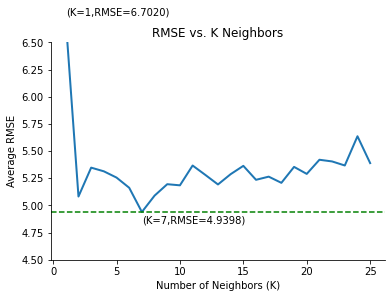

In [ ]:
#Plot a line showing the calculated average RMSE for 10-fold cross-validation for the model.
#Predicting features ["CRIM","ZN","RM","AGE","DIS","TAX"] used for 
#Predicted response ["MEDV"]

#Assign K_values as a sequence from 1 to 25 for the plot's x-axis.
K_values = np.arange(K_min, K_max+1)

#Find K with largest and smallest RMSE for plot
max_knn_RMSE = -1
min_knn_RMSE = 10000
max_knn_K = 0
min_knn_K = 0
for i in range(len(nn_K)):
    if nn_K[i] > max_knn_RMSE:
        max_knn_RMSE = nn_K[i]
        max_knn_K = i+1
    if nn_K[i] < min_knn_RMSE:
        min_knn_RMSE = nn_K[i]
        min_knn_K = i+1

#Create plot space, and draw the trend line
ax3 = plt.subplot(111)
ax3.plot(K_values, nn_K, linewidth=2)

#Add horizontal lines to highlight the maximum and minimum average RMSEs
ax3.axhline(y=max_knn_RMSE, ls="--", c="red")
ax3.axhline(y=min_knn_RMSE, ls="--", c="green")

#Add text for the (K,avg_rmse) pairs corresponding to the minimum and maximum average RMSEs
ax3.text(x=max_knn_K, y=max_knn_RMSE+0.05, s="(K=%i,RMSE=%.4f)" % (max_knn_K,max_knn_RMSE), fontsize=10)
ax3.text(x=min_knn_K, y=min_knn_RMSE-0.1, s="(K=%i,RMSE=%.4f)" % (min_knn_K,min_knn_RMSE), fontsize=10)

#Set wider bounds for y-axis

ax3.set_ybound(4.5,6.5)

#Get rid of axes and tick marks on top and right
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
ax3.yaxis.set_ticks_position("left")
ax3.xaxis.set_ticks_position("bottom")

#Add title, xlabels, and ylabels
plt.title("RMSE vs. K Neighbors")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Average RMSE")

#Show Plot
plt.show()